# Pendahuluan

**Preparasi Data**

In [4]:
# Tahapan sebelumnya
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

url = "https://storage.googleapis.com/dqlab-dataset/heart_disease.csv"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, skiprows=[0])

# Menampilkan lima baris teratas
data.loc[:,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# Melihat tipe data
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# Melihat keunikan data
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [390]:
# Melihat persebaran data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Pelabelan Data Kategorikal**

In [391]:
# Pelabelan data kategorikal
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable or definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'No disease',
                                         1: 'Disease'})

Cek Ubahan

In [392]:
# Cek ubahan data kategorikal
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversable defect,No disease
1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversable defect,No disease
2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversable defect,No disease
3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,atypical angina,140,221,No,normal,164,Yes,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
1021,60,Male,typical angina,125,258,No,probable or definite left ventricular hypertrophy,141,Yes,2.8,flat,Number of major vessels: 1,reversable defect,No disease
1022,47,Male,typical angina,110,275,No,probable or definite left ventricular hypertrophy,118,Yes,1.0,flat,Number of major vessels: 1,fixed defect,No disease
1023,50,Female,typical angina,110,254,No,probable or definite left ventricular hypertrophy,159,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease


In [393]:
# Cek perubahan
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

**Pemisahan Data Numerikal dan Kategorikal**

In [394]:
# Pisahkan numerikal dan kategorikal 
numerical_col = data.select_dtypes(exclude=np.object_)
categorical_col = data.select_dtypes(exclude=np.number)

In [395]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan data kategorikal: {} dengan {}".format(i, data[i].unique()))
    print()

Berikut ini merupakan data kategorikal: sex dengan ['Male' 'Female']

Berikut ini merupakan data kategorikal: cp dengan ['typical angina' 'atypical angina' 'non-anginal pain' 'asymtomatic']

Berikut ini merupakan data kategorikal: fbs dengan ['No' 'Yes']

Berikut ini merupakan data kategorikal: restecg dengan ['normal' 'probable or definite left ventricular hypertrophy'
 'ST-T Wave abnormal']

Berikut ini merupakan data kategorikal: exang dengan ['No' 'Yes']

Berikut ini merupakan data kategorikal: slope dengan ['upsloping' 'downsloping' 'flat']

Berikut ini merupakan data kategorikal: ca dengan ['Number of major vessels: 2' 'Number of major vessels: 0'
 'Number of major vessels: 1' 'Number of major vessels: 3' 4]

Berikut ini merupakan data kategorikal: thal dengan ['reversable defect' 'fixed defect' 'normal' 0]

Berikut ini merupakan data kategorikal: target dengan ['No disease' 'Disease']



**Memperbaiki Kesalahan Data**

In [396]:
# Melihat jumlah nilai unik dari kolom 'ca'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
4                              18
Name: count, dtype: int64

In [397]:
# Menemukan baris dengan kolom 'ca' bernilai '4'
data[data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
83,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
128,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
208,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
242,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
290,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
340,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
348,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease
417,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
428,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease


In [398]:
# Ganti kolom 'ca' yang bernilai '4' menjadi NaN
data.loc[data['ca']==4, 'ca'] = np.nan

In [399]:
# Cek kembali apakah masih ada data kolom 'ca' yang bernilai '4'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
Name: count, dtype: int64

In [400]:
# Melihat jumlah nilai unik dari kolom 'thal'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
0                      7
Name: count, dtype: int64

In [401]:
# Ganti kolom 'thal' yang bernilai '0' menjadi NaN
data.loc[data['thal']==0, 'thal'] = np.nan

In [402]:
# Cek kembali apakah masih ada data kolom 'thal' yang bernilai '0'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
Name: count, dtype: int64

In [403]:
# Check missing values
# print("Hasil missing value:\n", data.isnull())
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

In [404]:
'''Mengisi dengan modus'''
# Fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].mode()[0]
data['ca'] = data['ca'].fillna(modus_ca)

# Fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].mode()[0]
data['thal'] = data['thal'].fillna(modus_thal)

In [405]:
# Check missing values kembali
# print("Hasil missing value:\n", data.isnull())
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [406]:
# Memeriksa duplikat data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [407]:
# Menampilkan baris data duplicate
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,Female,atypical angina,118,210,No,normal,192,No,0.7,upsloping,Number of major vessels: 0,fixed defect,Disease
31,50,Female,atypical angina,120,244,No,normal,162,No,1.1,upsloping,Number of major vessels: 0,fixed defect,Disease
43,46,Male,typical angina,120,249,No,probable or definite left ventricular hypertrophy,144,No,0.8,upsloping,Number of major vessels: 0,reversable defect,No disease
55,55,Male,typical angina,140,217,No,normal,111,Yes,5.6,downsloping,Number of major vessels: 0,reversable defect,No disease
61,66,Female,non-anginal pain,146,278,No,probable or definite left ventricular hypertrophy,152,No,0.0,flat,Number of major vessels: 1,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,atypical angina,140,221,No,normal,164,Yes,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
1021,60,Male,typical angina,125,258,No,probable or definite left ventricular hypertrophy,141,Yes,2.8,flat,Number of major vessels: 1,reversable defect,No disease
1022,47,Male,typical angina,110,275,No,probable or definite left ventricular hypertrophy,118,Yes,1.0,flat,Number of major vessels: 1,fixed defect,No disease
1023,50,Female,typical angina,110,254,No,probable or definite left ventricular hypertrophy,159,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease


In [408]:
'''Menghapus data duplikat dan mempertahankan data pertama'''
# Menghapus data duplikat
data.drop_duplicates(keep='first', inplace=True)

# Memeriksa ulang duplikat data
duplicate_check=data.duplicated().any()

print("Apakah masih ada duplikat?", duplicate_check)
data[data.duplicated()]

Apakah masih ada duplikat? False


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# Exploratory Data Analysis
**Mengecek Outlier Data**

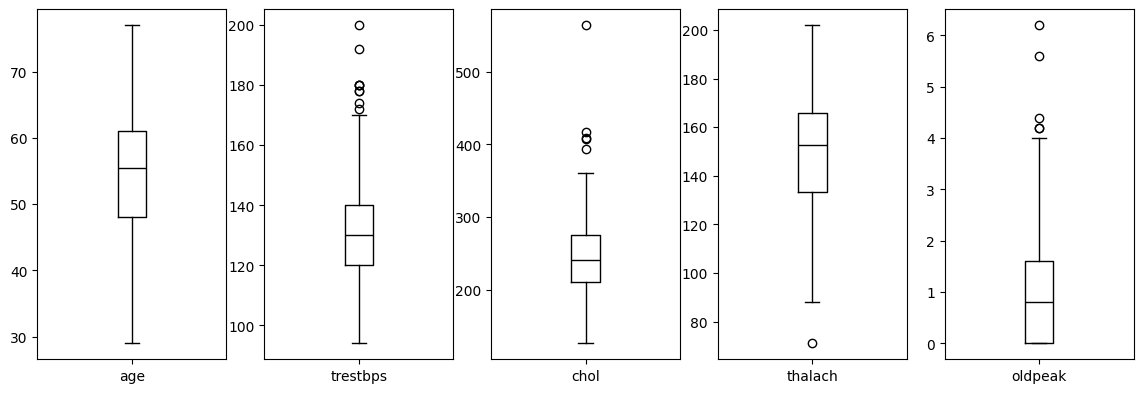

In [409]:
'''Menampilkan boxplot seluruh data'''
#Menampilkan boxplot untuk melihat outliers data numerik
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

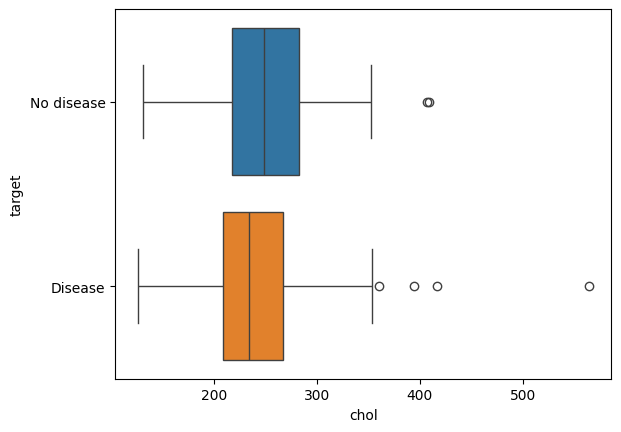

In [410]:
'''Menampilkan boxplot chol per target'''
# Menampilkan data berdasarkan target untuk feature chol
sns.boxplot(data, x='chol', y='target', hue='target')
plt.show()

In [411]:
'''Menentukan data continous'''
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

'''Menampilkan data yang outlier'''
outliers(data[continous_features])

For the feature age, Num of Outliers is 0
For the feature trestbps, Num of Outliers is 9
For the feature chol, Num of Outliers is 5
For the feature thalach, Num of Outliers is 1
For the feature oldpeak, Num of Outliers is 5


In [412]:
# Menghapus outlier secara permanen
outliers(data[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [413]:
# Cek ubahan
outliers(data[continous_features])

For the feature age, Num of Outliers is 0
For the feature trestbps, Num of Outliers is 0
For the feature chol, Num of Outliers is 0
For the feature thalach, Num of Outliers is 0
For the feature oldpeak, Num of Outliers is 0


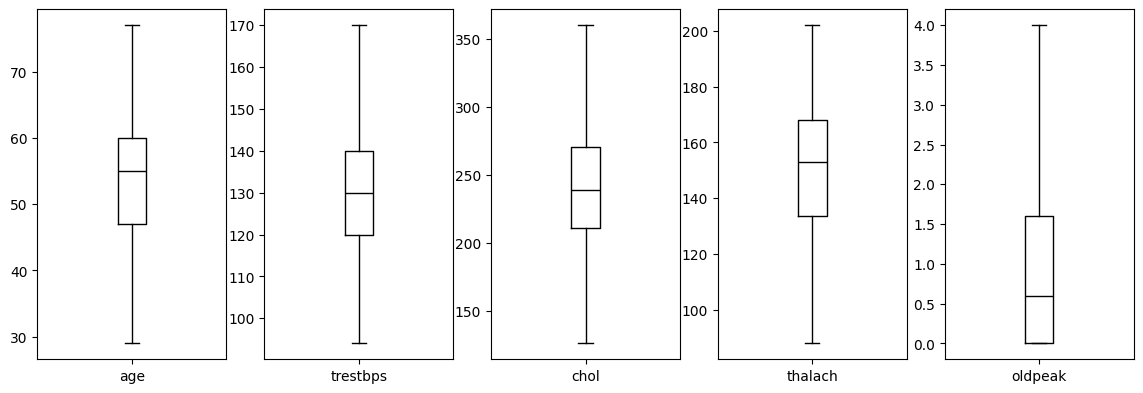

In [414]:
# Menampilkan boxplot untuk melihat outliers data numerik
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

**Mengecek Persebaran Data**

In [415]:
# Data normalisasi 'sex'
data.sex.value_counts(normalize=True)

sex
Male      0.699647
Female    0.300353
Name: proportion, dtype: float64

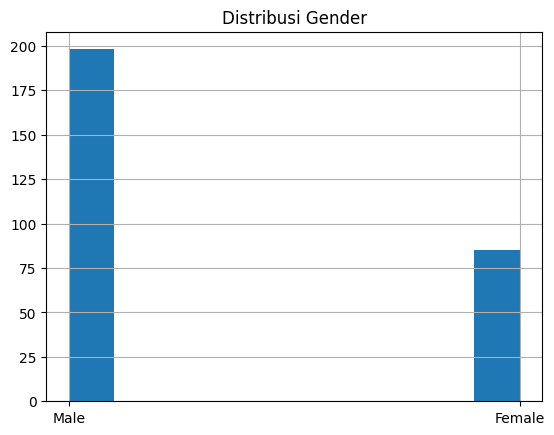

In [416]:
'''Membuat histogram sex'''
# Jumlah kategori sex pada dataset
data.sex.hist().plot(kind='bar')
plt.title('Distribusi Gender')
plt.show()

In [417]:
# Data normalisasi 'age'
data.age.value_counts(normalize=True)

age
58    0.063604
57    0.060071
54    0.053004
59    0.042403
52    0.042403
60    0.038869
51    0.038869
44    0.038869
41    0.035336
64    0.031802
62    0.031802
56    0.031802
43    0.028269
53    0.028269
42    0.028269
63    0.028269
61    0.028269
45    0.028269
67    0.024735
46    0.024735
65    0.024735
48    0.024735
50    0.024735
66    0.021201
55    0.021201
47    0.017668
49    0.017668
70    0.014134
39    0.014134
35    0.014134
71    0.010601
69    0.010601
40    0.010601
68    0.010601
34    0.007067
38    0.007067
37    0.007067
29    0.003534
76    0.003534
77    0.003534
74    0.003534
Name: proportion, dtype: float64

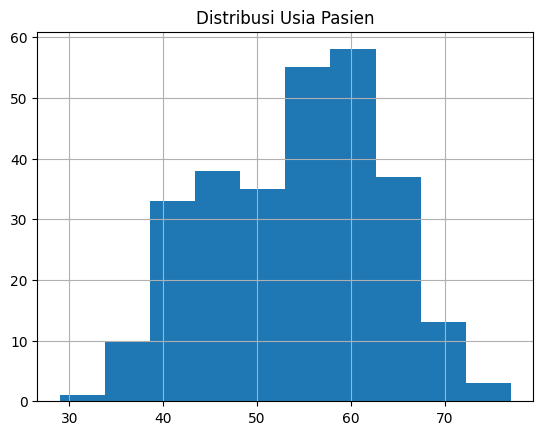

In [418]:
'''Membuat histogram age'''
# Jumlah kategori age pada dataset
data.age.hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien')
plt.show()

In [419]:
# Data normalisasi 'cp'
data.cp.value_counts(normalize=True)

cp
typical angina      0.459364
non-anginal pain    0.289753
atypical angina     0.173145
asymtomatic         0.077739
Name: proportion, dtype: float64

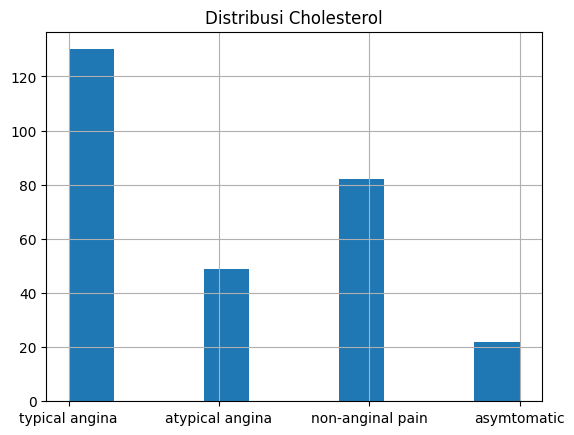

In [420]:
'''Membuat histogram cp'''
# Jumlah kategori cp pada dataset
data.cp.hist().plot(kind='bar')
plt.title('Distribusi Cholesterol')
plt.show()

In [421]:
# Data normalisasi target
data.target.value_counts(normalize=True)

target
Disease       0.558304
No disease    0.441696
Name: proportion, dtype: float64

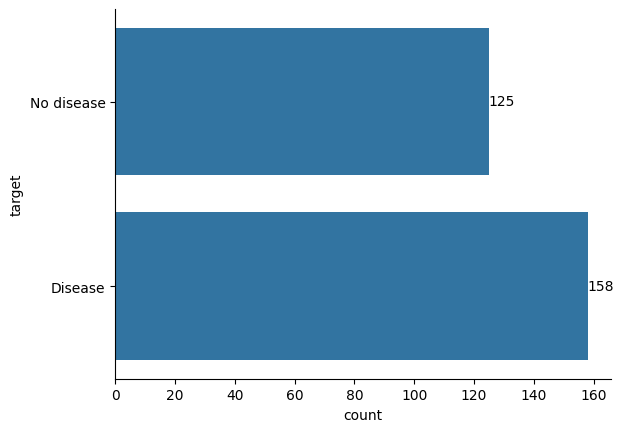

In [422]:
'''Memeriksa data imbalance'''
# Memeriksa data imbalance
ax = sns.countplot(data['target'])
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [423]:
# Melihat statistik deskriptif dari data
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,129.883392,242.314488,149.961131,0.951943
std,9.128186,15.387795,44.654188,22.691625,1.026400
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,210.500000,133.500000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000
75%,60.000000,140.000000,270.500000,168.000000,1.600000
max,77.000000,170.000000,360.000000,202.000000,4.000000


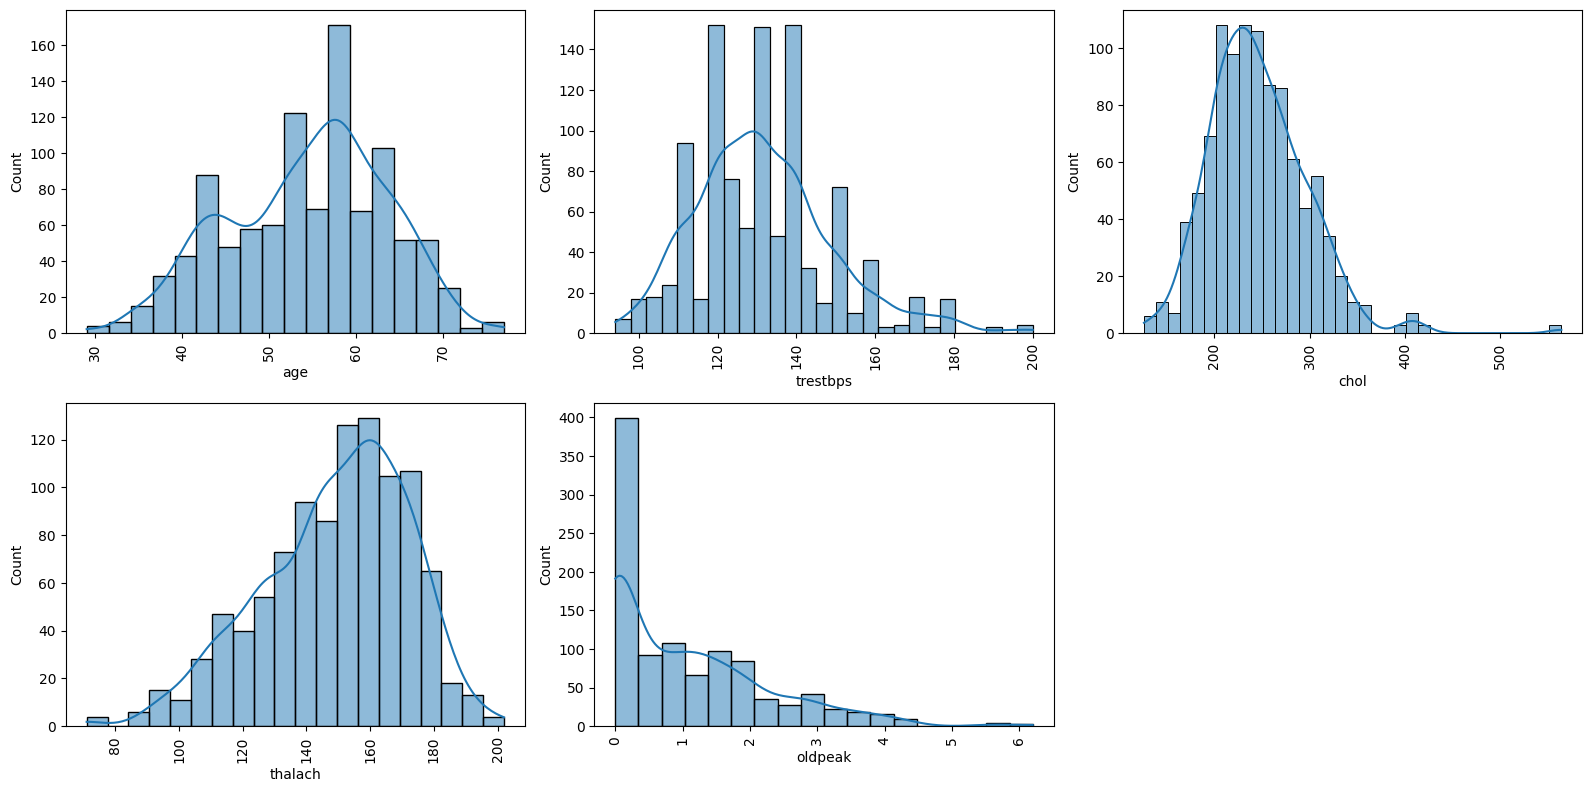

In [424]:
# Memvisualisasikan distribusi variabel numerical
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

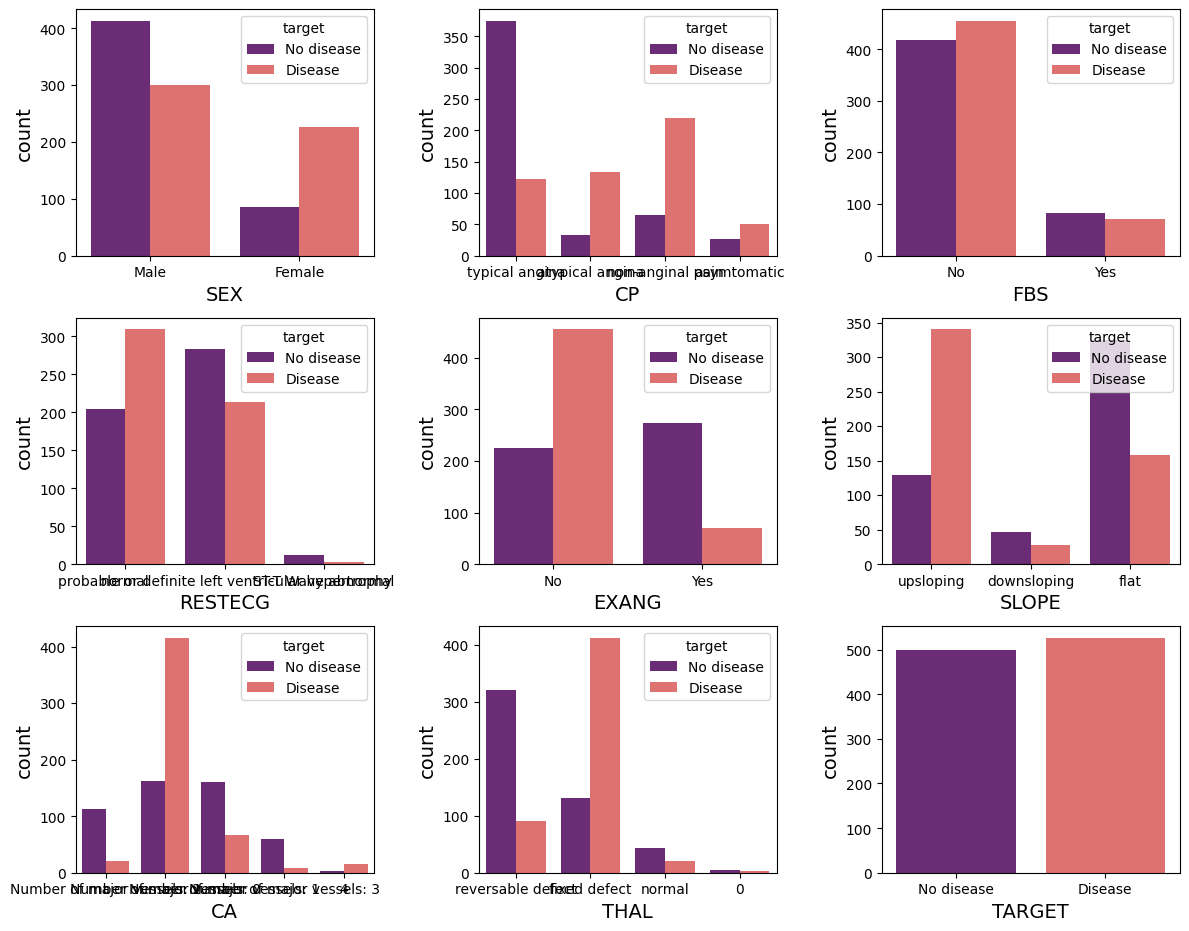

In [425]:
# Memvisualisasikan distribusi variabel kategorikal
plt.figure(figsize=(12,12))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=categorical_col,x=column, hue='target', palette='magma')
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

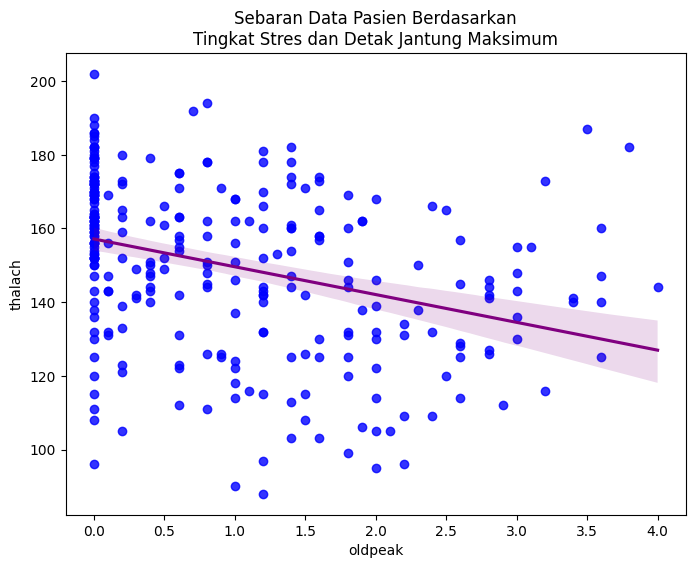

In [426]:
'''Menampilkan oldpeak dengan thalach'''
# melihat korelasi tingkat depresi dan detak jantung maksimum
plt.figure(figsize = (8,6))
sns.regplot(data, x='oldpeak', y='thalach', scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Detak Jantung Maksimum')
plt.show()

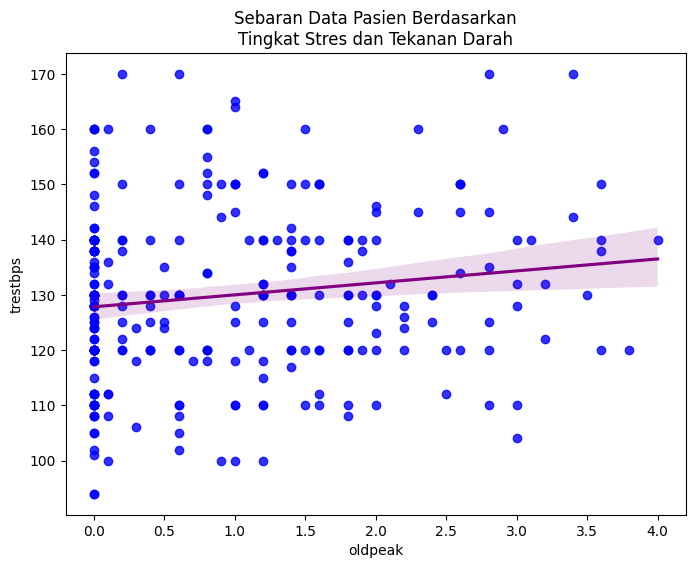

In [427]:
'''Menampilkan oldpeak dengan trestbps'''
# melihat korelasi tingkat depresi dan tekanan darah
plt.figure(figsize = (8,6))
sns.regplot(data, x='oldpeak', y='trestbps', scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Tekanan Darah')
plt.show()

# Data Analysis
**Mengubah Data Kategorikal Kembali Menjadi Numerikal untuk Analisis**

In [428]:
# Simpan data yang sudah ada label
data.to_csv('datafix.csv')

# Melabeli kembali datanya
df['sex'] = data['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = data['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = data['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = data['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = data['exang'].replace({'No':0,'Yes':1})
df['slope'] = data['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = data['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = data['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = data['target'].replace({'No disease':0,'Disease':1})



**Korelasi Antar Variabel Data**

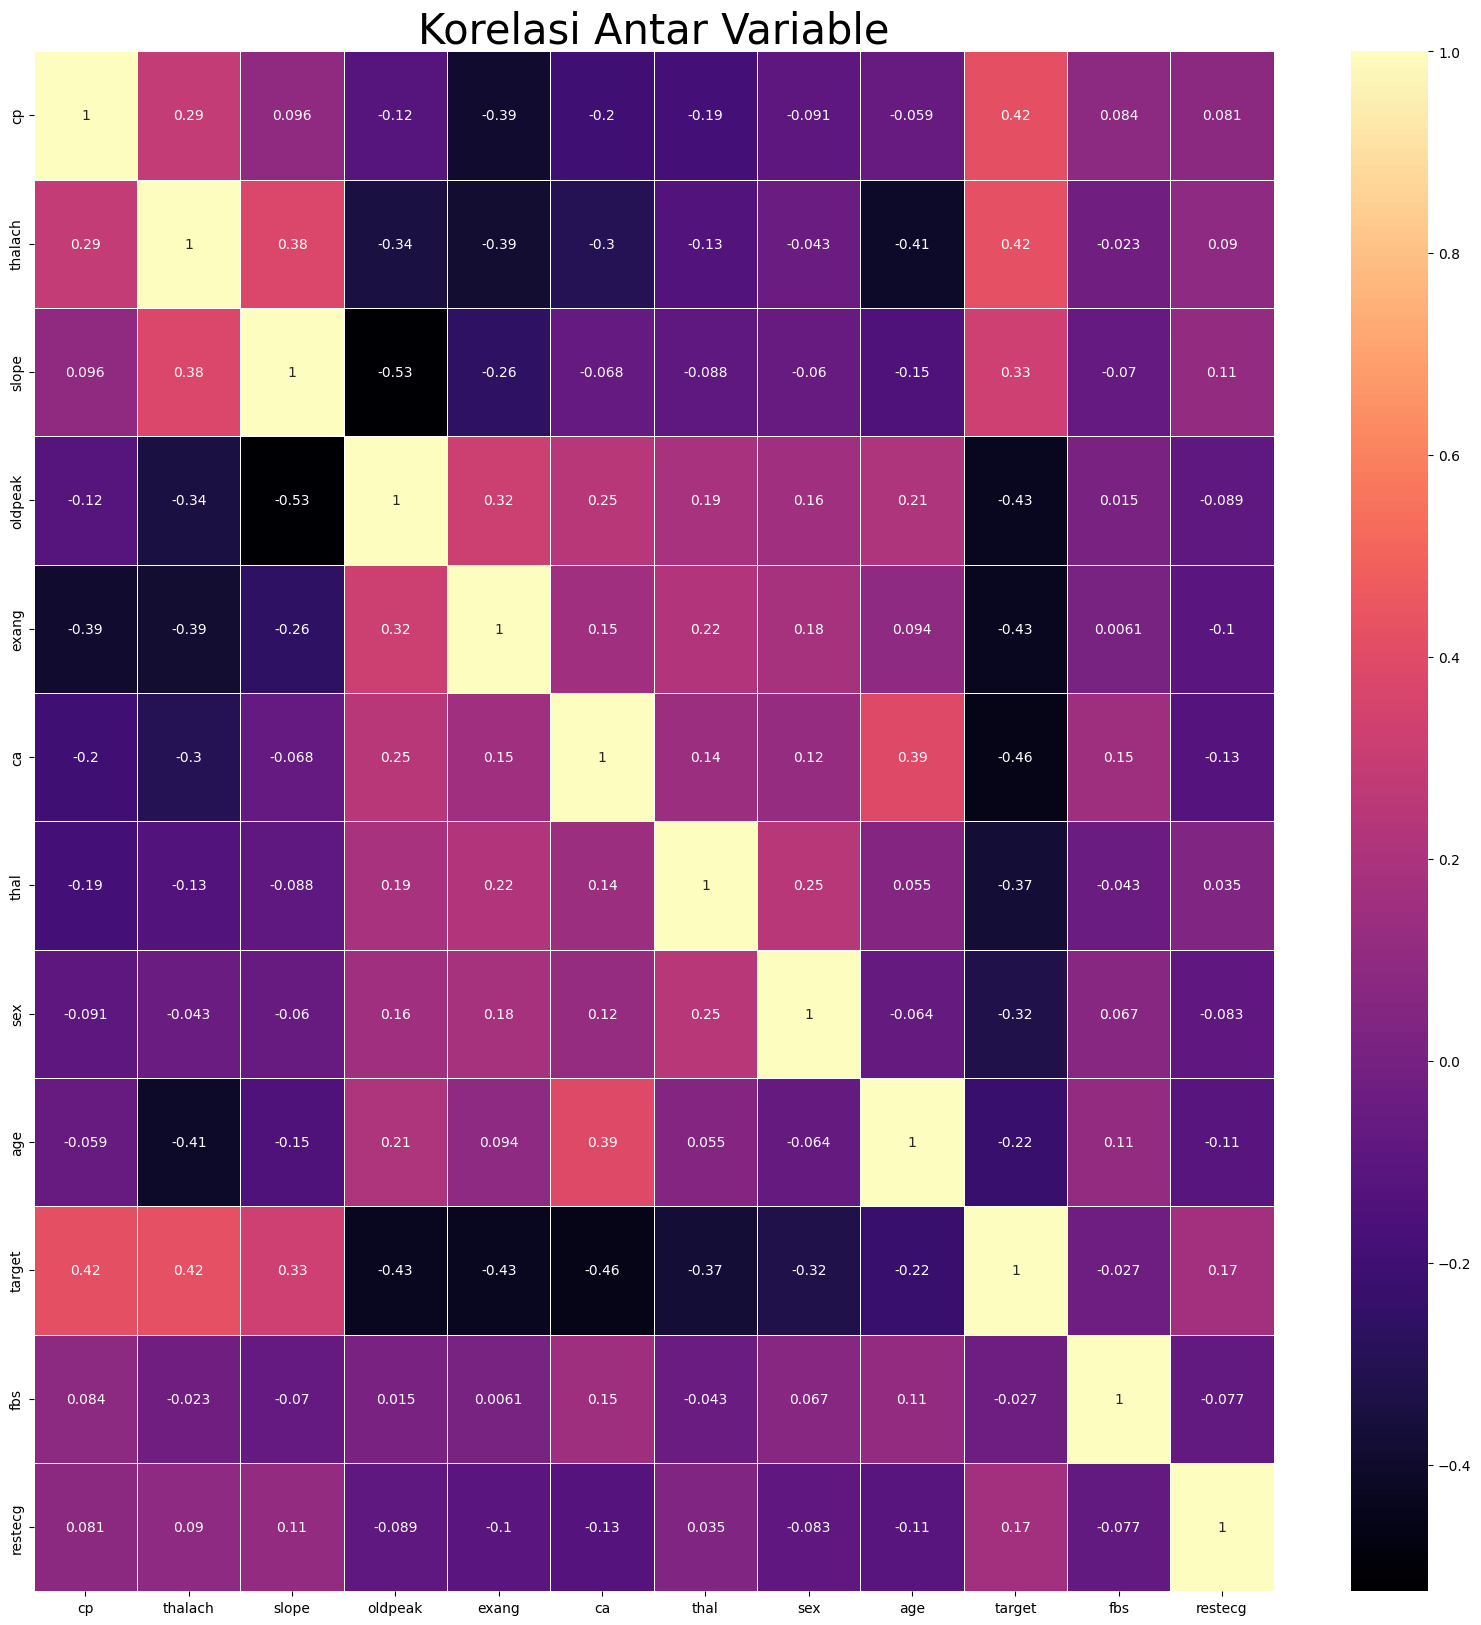

In [429]:
'''Menampilkan grafik korelasi'''
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

In [430]:
'''Menampilkan tabel korelasi'''
cor_matrix = df.corr()
cor_matrix

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age,target,fbs,restecg
cp,1.000000,0.285605,0.095881,-0.122582,-0.388610,-0.202923,-0.188487,-0.091357,-0.058687,0.416319,0.084389,0.080836
thalach,0.285605,1.000000,0.376494,-0.341190,-0.387726,-0.296480,-0.134498,-0.042981,-0.411108,0.422559,-0.023484,0.089556
slope,0.095881,0.376494,1.000000,-0.525142,-0.259780,-0.067890,-0.088110,-0.060014,-0.149095,0.326473,-0.069563,0.111841
oldpeak,-0.122582,-0.341190,-0.525142,1.000000,0.318620,0.245318,0.189228,0.157352,0.209254,-0.434108,0.015070,-0.089255
exang,-0.388610,-0.387726,-0.259780,0.318620,1.000000,0.154768,0.223241,0.182596,0.093718,-0.431599,0.006080,-0.104440
ca,-0.202923,-0.296480,-0.067890,0.245318,0.154768,1.000000,0.140048,0.122489,0.392130,-0.456989,0.150552,-0.126825
thal,-0.188487,-0.134498,-0.088110,0.189228,0.223241,0.140048,1.000000,0.245682,0.054752,-0.370759,-0.042766,0.035452
sex,-0.091357,-0.042981,-0.060014,0.157352,0.182596,0.122489,0.245682,1.000000,-0.064118,-0.318896,0.066692,-0.083290
age,-0.058687,-0.411108,-0.149095,0.209254,0.093718,0.392130,0.054752,-0.064118,1.000000,-0.222416,0.106885,-0.110517
target,0.416319,0.422559,0.326473,-0.434108,-0.431599,-0.456989,-0.370759,-0.318896,-0.222416,1.000000,-0.027210,0.171453


In [431]:
# Mengurutkan korelasi
cor_matrix['target'].sort_values()

ca        -0.456989
oldpeak   -0.434108
exang     -0.431599
thal      -0.370759
sex       -0.318896
age       -0.222416
fbs       -0.027210
restecg    0.171453
slope      0.326473
cp         0.416319
thalach    0.422559
target     1.000000
Name: target, dtype: float64

Korelasi target(penyakit jantung) dengan variabel lainnya. Korelasi positif dengan variabel tertentu berarti semakin tinggi variabel tersebut maka akan semakin tinggi juga kemungkinan terkena penyakit jantung, sedangkan korelasi negatif ialah semakin rendah nilai variabel tersebut maka kemungkinan terkena penyakit jantung lebih tinggi.

1. ca -0.456989 (Korelasi Negatif Kuat)
2. oldpeak -0.434108 (Korelasi Negatif Kuat)
3. exang -0.431599 (Korelasi Negatif Kuat)
4. thal -0.370759 (Korelasi Negatif Kuat)
5. sex -0.318896 (Korelasi Negatif Kuat)
6. age -0.222416 (Korelasi Negatif)
7. trestbps -0.115614 (Korelasi Negatif Lemah)
8. chol -0.0105627 (Korelasi Negatif Lemah)
9. fbs 0.027210 (Korelasi Positif Lemah)
10. restecg 0.171453 (Korelasi Positif Lemah)
11. slope 0.326473 (korelasi Positif Kuat)
12. cp 0.416319 (korelasi Positif Kuat)
13. thalach 0.422559 (korelasi Positif Kuat)

Jadi, bisa disimpulkan faktor yang paling berpengaruh terhadap penyakit jantung ialah, sebagai berikut:

1. ca (semakin banyak major vessels ,maka akan semakin tinggi resiko terkena penyakit jantung)
2. oldpeak (Semakin rendah depresi ST yang disebabkan oleh latihan relatif terhadap istirahat, maka resiko terkena penyakit jantung akan semakin tinggi)
3. exang (Apibila exercise induced angina rendah, maka resiko terkena penyakit jantung akan semakin tinggi)
4. thal(semakin rendah tipe jenis defek jantung, maka resiko terkena penyakit jantung semakin tinggi)
5. sex (Perempuan memiliki resiko terkena penyakit jantung lebih tinggi dibandingkan laki-laki)
6. age (semakin muda umur, ternyata semakin tinggi terkena penyakit jantung)
7. slope (Semakin tinggi kemiringan segmen latihan ST maka, resiko terkena penyakit jantung semakin tinggi)
8. cp (Semakin tinggi tipe Jenis rasa sakit pada dada, maka resiko terkena penyakit jantung semakin tinggi)
9. thalach (semakin tinggi detak jantung maksimum yang dicapai pasien selama tes latihan, maka resiko terkena penyakit jantung semakin tinggi)

Kesimpulan.

1. 'cp', 'thalach', dan 'slope' berkorelasi positif cukup kuat dengan 'target'.
2. 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' berkorelasi cukup kuat dengan 'target'.
3. 'fbs', 'chol', 'trestbps', dan 'restecg' memiliki korelasi yang lemah dengan 'target'.

Feature yang dipilih yaitu :'cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' untuk dianalisa lebih lanjut bersama dengan 'target'

In [432]:
'''Memasukkan 10 variabel terpilih diatas'''
variabel = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age','target']
df = df[variabel]
df.loc[:,:]

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age,target
0,0,168,2,1.0,0,2,3,1,52,0
1,0,155,0,3.1,1,0,3,1,53,0
2,0,125,0,2.6,1,0,3,1,70,0
3,0,161,2,0.0,0,1,3,1,61,0
4,0,106,1,1.9,0,3,2,0,62,0
...,...,...,...,...,...,...,...,...,...,...
723,2,115,1,1.5,0,0,2,0,68,1
733,2,175,1,0.6,0,0,2,0,44,1
739,0,161,2,0.0,1,1,3,1,52,0
843,3,125,2,0.0,0,0,2,1,59,0


In [433]:
'''Membuat penggalian informasi dari data teratas dan meliat kolomnya'''
# Liat informasi dari dataset yang kita miliki
print(df.head())
print(df.columns)

   cp  thalach  slope  oldpeak  exang  ca  thal  sex  age  target
0   0      168      2      1.0      0   2     3    1   52       0
1   0      155      0      3.1      1   0     3    1   53       0
2   0      125      0      2.6      1   0     3    1   70       0
3   0      161      2      0.0      0   1     3    1   61       0
4   0      106      1      1.9      0   3     2    0   62       0
Index(['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex',
       'age', 'target'],
      dtype='object')


**Memisahkan variabel dependen dan independen**

Variabel dependen yang digunakan adalah data pada kolom 'target', kolom feature merupakan variabel independen.

In [434]:
'''Memisahkan variabel X dan y'''
# Define X and y
X = df.drop('target', axis=1)
y = df.target

In [435]:
# Melihat kolom yang termasuk variable indepnden
X.head()

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age
0,0,168,2,1.0,0,2,3,1,52
1,0,155,0,3.1,1,0,3,1,53
2,0,125,0,2.6,1,0,3,1,70
3,0,161,2,0.0,0,1,3,1,61
4,0,106,1,1.9,0,3,2,0,62


In [436]:
# Melihat variabel dependen
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [437]:
'''Membuat scaling data'''
# Mendefinisikan standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8
0,-0.957616,0.796365,0.956956,0.046903,-0.682877,1.505009,1.191552,0.655204,-0.224919
1,-0.957616,0.222452,-2.386483,2.096513,1.464392,-0.707550,1.191552,0.655204,-0.115174
2,-0.957616,-1.101964,-2.386483,1.608511,1.464392,-0.707550,1.191552,0.655204,1.750489
3,-0.957616,0.487335,0.956956,-0.929101,-0.682877,0.398730,1.191552,0.655204,0.762785
4,-0.957616,-1.940760,-0.714764,0.925307,-0.682877,2.611288,-0.537726,-1.526241,0.872530
...,...,...,...,...,...,...,...,...,...
278,0.985074,-1.543436,-0.714764,0.534906,-0.682877,-0.707550,-0.537726,-1.526241,1.530999
279,0.985074,1.105396,-0.714764,-0.343498,-0.682877,-0.707550,-0.537726,-1.526241,-1.102878
280,-0.957616,0.487335,0.956956,-0.929101,1.464392,0.398730,1.191552,0.655204,-0.224919
281,1.956419,-1.101964,0.956956,-0.929101,-0.682877,-0.707550,-0.537726,0.655204,0.543295


In [438]:
X.loc[:,:]

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age
0,0,168,2,1.0,0,2,3,1,52
1,0,155,0,3.1,1,0,3,1,53
2,0,125,0,2.6,1,0,3,1,70
3,0,161,2,0.0,0,1,3,1,61
4,0,106,1,1.9,0,3,2,0,62
...,...,...,...,...,...,...,...,...,...
723,2,115,1,1.5,0,0,2,0,68
733,2,175,1,0.6,0,0,2,0,44
739,0,161,2,0.0,1,1,3,1,52
843,3,125,2,0.0,0,0,2,1,59


**Spliting data**

Memisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20 dan random state 42 menggunakan data yang sudah dilakukan scaling

In [439]:
'''Memisahkan data menjadi beberapa klasifikasi train dan testing'''
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 9)
(57, 9)
(226,)
(57,)


**Pemodelan dengan Heart Disease Dataset**

Melakukan pemodelan untuk 4 model berbeda diantaranya logistic regression, decision tree, random forest dan neural networks.

In [440]:
# Menyiapkan libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [441]:
'''Membuat model Logistik Regresi dan menghitung akurasinya'''
clf = LogisticRegression()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression Classifier is  0.8421052631578947


In [442]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [443]:
'''Membuat model Decision Tree dan menghitung akurasinya'''
clf = DecisionTreeClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7192982456140351


In [444]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.76      0.71      0.73        31

    accuracy                           0.72        57
   macro avg       0.72      0.72      0.72        57
weighted avg       0.72      0.72      0.72        57



In [445]:
'''Membuat model Random Forest dan menghitung akurasinya'''
clf = RandomForestClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.8421052631578947


In [446]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [447]:
'''Membuat model MLP dan menghitung akurasinya'''
clf = MLPClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of MLP Classifier is  0.8421052631578947


In [448]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



**Membandingkan hasil diatas**

Berdasarkan hasil ke-4 model (Random Forest, Logistic Regression, Decision Tree dan Multi-layer Perceptron). Berikut didapatkan akurasi pada proses kali ini:
- Pada model Decision Tree memiliki nilai akurasi terkecil sebesar 72% dengan recall sebesar 72%.
- Logistik Regression memiliki nilai akurasi terbesar sebesar 84% dengan recall 84%.

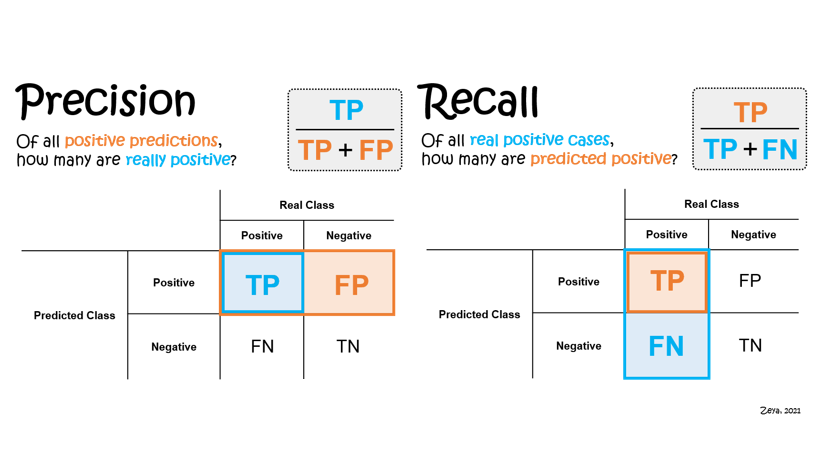

# Hyperparameter Tuning

**Pojok Catatan**

Recall: Kemampuan model untuk menemukan semua kasus relevan dimana kebanyakan penting untuk deteksi risiko tinggi (seperti deteksi kanker), recall adalah metrik evaluasi yang lebih penting daripada presisi.

Dalam kasus prediksi gagal jantung, kita ingin menghindari false negatives sebanyak mungkin. Kasus false negative berarti masalah gagal jantung tidak terdeteksi, yang bisa sangat berbahaya. Dalam kasus penggunaan ini, false positives (seseorang yang sehat dengan diagnosis masalah jantung tidak sehat) tidak sepenting mencegah situasi ketika kita tidak mendeteksi masalah serius.

**Proses Hyperparameter Tuning**

In [290]:
help(LogisticRegression) 

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(
 |      penalty='l2',
 |      *,
 |      dual=False,
 |      tol=0.0001,
 |      C=1.0,
 |      fit_intercept=True,
 |      intercept_scaling=1,
 |      class_weight=None,
 |      random_state=None,
 |      solver='lbfgs',
 |      max_iter=100,
 |      multi_class='deprecated',
 |      verbose=0,
 |      warm_start=False,
 |      n_jobs=None,
 |      l1_ratio=None
 |  )
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and

In [449]:
'''Membuat hyperparameter Logistik Regresi dan menghitung akurasinya'''
# Logistic regression classifier with hyperparameter
clf = LogisticRegression()

param_grid = {
    'max_iter': [50, 100, 150, 200],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_lg = gs1.fit(X_train, y_train)

print(fit_clf_lg.best_score_)
print(fit_clf_lg.best_params_)

0.9209805668016194
{'max_iter': 50, 'multi_class': 'auto', 'solver': 'liblinear'}


In [450]:
y_pred = fit_clf_lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [293]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(
 |      n_estimators=100,
 |      *,
 |      criterion='gini',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features='sqrt',
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      bootstrap=True,
 |      oob_score=False,
 |      n_jobs=None,
 |      random_state=None,
 |      verbose=0,
 |      warm_start=False,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      max_samples=None,
 |      monotonic_cst=None
 |  )
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to p

In [453]:
'''Membuat hyperparameter Random Forest dan menghitung akurasinya'''
# Random Forest classifier with hyperparameter
clf = RandomForestClassifier()

param_grid = {'n_estimators': [50, 80, 90], 
               'max_depth': [2, 4, 6, 8, 10], 
               'criterion': ['gini', 'entropy', 'log_loss']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_rf = gs1.fit(X_train, y_train)

print(fit_clf_rf.best_score_)
print(fit_clf_rf.best_params_)

0.9182817813765182
{'criterion': 'log_loss', 'max_depth': 4, 'n_estimators': 80}


In [454]:
y_pred = fit_clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.85      0.90      0.88        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



In [296]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(
 |      *,
 |      criterion='gini',
 |      splitter='best',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=None,
 |      random_state=None,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      monotonic_cst=None
 |  )
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best",

In [455]:
'''Membuat hyperparameter Decision Tree dan menghitung akurasinya'''
# Decision Tree classifier with hyperparameter
clf = DecisionTreeClassifier()

param_grid = {'min_samples_leaf': [1,3,5,7,9,10], 
               'max_depth': [1,3,5,7,9], 
               'criterion': ['gini', 'entropy', 'log_loss']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_dt = gs1.fit(X_train, y_train)

print(fit_clf_dt.best_score_)
print(fit_clf_dt.best_params_)

0.8869076923076923
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10}


In [456]:
y_pred = fit_clf_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.79      0.87      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [299]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(
 |      hidden_layer_sizes=(100,),
 |      activation='relu',
 |      *,
 |      solver='adam',
 |      alpha=0.0001,
 |      batch_size='auto',
 |      learning_rate='constant',
 |      learning_rate_init=0.001,
 |      power_t=0.5,
 |      max_iter=200,
 |      shuffle=True,
 |      random_state=None,
 |      tol=0.0001,
 |      verbose=False,
 |      warm_start=False,
 |      momentum=0.9,
 |      nesterovs_momentum=True,
 |      early_stopping=False,
 |      validation_fraction=0.1,
 |      beta_1=0.9,
 |      beta_2=0.999,
 |      epsilon=1e-08,
 |      n_iter_no_change=10,
 |      max_fun=15000
 |  )
 |
 |  Multi-layer Perceptron classifier.
 |
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |
 |  .. versionadded:: 0.18
 |
 |  Parameters
 |  ----------
 |

In [459]:
'''Membuat hyperparameter MLP dan menghitung akurasinya'''
# MLP Classifier with hyperparameter
clf = MLPClassifier()

param_grid1 = {'hidden_layer_sizes': [8, 10, 20, 50, 100, 150, 200], 
               'activation': ['identity','logistic','tanh','relu'], 
               'solver': ['sgd','lbfgs','adam']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid1, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )

fit_clf_mlp = gs1.fit(X_train, y_train)

print(fit_clf_mlp.best_score_)
print(fit_clf_mlp.best_params_)

0.9308566801619435
{'activation': 'identity', 'hidden_layer_sizes': 100, 'solver': 'sgd'}


In [460]:
y_pred = fit_clf_mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



# Hasil dan Diskusi

In [461]:
data1={'Model':['Logistic Regression', 'Random Forest', 'Decision Tree', 'MLP'],
       'BEFORE':[0.84,0.84,0.72,0.84],
       'AFTER':[0.84,0.86,0.81,0.84]}

pd.DataFrame(data1)

,Model,BEFORE,AFTER
0,Logistic Regression,0.84,0.84
1,Random Forest,0.84,0.86
2,Decision Tree,0.72,0.81
3,MLP,0.84,0.84


**ROC Analysis**

Kurva yang menyajikan ilustrasi performansi dari binary classifier system dalam menghasilkan sebuah prediksi

In [462]:
'''ROC Analysis dari masing-masing model'''
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lg.predict_proba(X_test)[:,1]
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:,1]
y_pred_dt= fit_clf_dt.predict_proba(X_test)[:,1]
y_pred_mlp= fit_clf_mlp.predict_proba(X_test)[:,1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test,y_pred_logreg)
auc_rf = roc_auc_score(y_test,y_pred_rf)
auc_dt = roc_auc_score(y_test,y_pred_dt)
auc_mlp = roc_auc_score(y_test,y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.879652605459057
AUC-ROC for Random Forest: 0.9007444168734492
AUC-ROC for Decision Tree: 0.847394540942928
AUC-ROC for MLP: 0.8908188585607941


Jika dilihat dari nilai AUC-ROC, model Random Forest memiliki nilai yang paling tinggi sedangkan model Decision Tree adalah model yang memiliki nilai paling rendah. Perbedaan nilai AUC-ROC antar keempat model tidak terpaut jauh.

ROC adalah kurva probabilitas dan AUC mewakili tingkat atau ukuran pemisahan. Ini menunjukkan seberapa baik model mampu membedakan antara kelas. Semakin tinggi AUC, semakin baik modelnya dalam memprediksi kelas 0 sebagai 0 dan kelas 1 sebagai 1.

Kurva ROC digambarkan dengan TPR (True Positive Rate) melawan FPR (False Positive Rate) di mana TPR berada di sumbu y dan FPR berada di sumbu x.

Model yang sangat baik memiliki AUC mendekati 1, yang berarti memiliki ukuran pemisahan yang baik. Model yang buruk memiliki AUC mendekati 0, yang berarti memiliki ukuran pemisahan yang terburuk.

Ketika AUC adalah 0.7, artinya ada peluang sebesar 70% bahwa model akan mampu membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0.5, model tidak memiliki kemampuan diskriminasi untuk membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0, model memprediksi kelas negatif sebagai kelas positif dan sebaliknya.

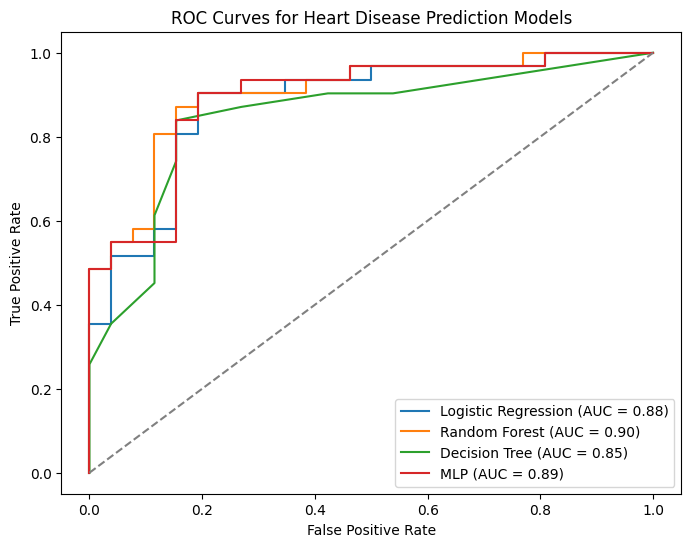

In [463]:
'''ROC Analysis Graph'''
#Membuat ROC Analisis
def plot_roc_curves(y_pred,y_pred_logreg,y_pred_rf,y_pred_dt,y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test,y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test,y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test,y_pred_dt)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test,y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0,1],[0,1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp)

In [464]:
'''ROC Analysis Graph untuk menentukan treshold'''
def find_rates_for_thresholds(y_test, y_pred, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_test, y_pred_dt, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_test, y_pred_mlp, thresholds)

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({
    'Thresholds':thresholds,
    'FPR_Logreg':fpr_logreg,
    'TPR_Logreg':tpr_logreg,
    'FPR_RF':fpr_rf,
    'TPR_RFg':tpr_rf,
    'FPR_DT':fpr_dt,
    'TPR_DT':tpr_dt,
    'FPR_MLP':fpr_mlp,
    'TPR_MLP':tpr_mlp
})

print(summary_df)

    Thresholds  FPR_Logreg  TPR_Logreg    FPR_RF   TPR_RFg    FPR_DT  \
0          0.0    1.000000    1.000000  1.000000  1.000000  0.538462   
1          0.1    0.500000    0.935484  0.730769  0.967742  0.423077   
2          0.2    0.346154    0.935484  0.538462  0.967742  0.423077   
3          0.3    0.269231    0.903226  0.384615  0.935484  0.269231   
4          0.4    0.192308    0.903226  0.307692  0.903226  0.269231   
5          0.5    0.192308    0.870968  0.192308  0.903226  0.269231   
6          0.6    0.192308    0.838710  0.192308  0.870968  0.153846   
7          0.7    0.153846    0.612903  0.115385  0.709677  0.115385   
8          0.8    0.115385    0.548387  0.000000  0.451613  0.115385   
9          0.9    0.000000    0.322581  0.000000  0.225806  0.115385   
10         1.0    0.000000    0.000000  0.000000  0.000000  0.000000   

      TPR_DT   FPR_MLP   TPR_MLP  
0   0.903226  1.000000  1.000000  
1   0.903226  0.500000  0.967742  
2   0.903226  0.384615  0.9354

In [465]:
'''ROC Analysis Graph untuk menentukan best treshold'''
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    optimal_idx = np.argmax(tpr - fpr)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.4246777284072778
Best threshold for Random Forest: 0.63738507894723
Best threshold for Decision Tree: 0.6111111111111112
Best threshold for MLP: 0.4273379220359259


In [3]:
import pandas as pd
comp={'Model':['Logistic Regression', 'Random Forest', 'Decision Tree', 'MLP'],
       'Accuracy':[0.84,0.86,0.81,0.84],
       'ROC AUC':[0.88,0.90,0.85,0.89],
       'Best Threshold':[0.42,0.64,0.61,0.43]}

pd.DataFrame(comp)

,Model,Accuracy,ROC AUC,Best Threshold
0,Logistic Regression,0.84,0.88,0.42
1,Random Forest,0.86,0.90,0.64
2,Decision Tree,0.81,0.85,0.61
3,MLP,0.84,0.89,0.43


# Kesimpulan
**Poin Penting:**

1. Jika kita menginginkan model yang memiliki sensitivitas yang tinggi, yaitu kemampuan untuk mendeteksi sebanyak mungkin kasus positif (True Positive), maka lebih baik menggunakan treshold yang lebih rendah. Namun, ini mungkin juga akan menyebabkan peningkatan False Positive Rate (kasus negatif yang salah diprediksi positif).
2. Sebaliknya, jika kita ingin mengurangi kesalahan dalam memprediksi kasus negatif sebagai positif (False Positive), maka kita akan memilih treshold yang lebih tinggi. Namun, ini dapat mengurangi sensitivitas model (menyebabkan lebih banyak True Negative yang salah diprediksi negatif).

Jadi dapat disimpulkan, bahwa model yang peformanya lebih bagus ialah model Random Forest dengan ditandai dengan model Random Forest yang memiliki nilai akurasi pada classification report tertinggi, yaitu sebesar 86% dan Model Random Forest memiliki score AUC-ROC Terbesar dibandingkan 3 model lainnya, yaitu sebesar 91%, namun model ini memiliki treshold yang tinggi dimana akan meningkatkan FPR (Kasus negatif yang salah diprediksi positif).

In [466]:
'''Menyimpan model yang terbaik'''
import pickle
# Menyimpan model terbaik dengan pickle
pklname = 'generate_heart_disease.pkl'

with open(pklname, 'wb') as file:  
    pickle.dump(fit_clf_rf, file)

Copyright © Izzuddin Al Qossam